<a href="https://colab.research.google.com/github/arzah/Data_Analyst_Portfolio/blob/main/Fake_News_Reddit_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd # importing pandas for data manipulation

df = pd.read_csv("reddit_metadata.csv") # reading the csv file into a data frame

df.info() # inspecting the data.
df.head() # printing the first 5 rows of the data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878218 entries, 0 to 878217
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              878218 non-null  int64  
 1   hasImage        878218 non-null  bool   
 2   user_name_len   729472 non-null  float64
 3   title_len       804378 non-null  float64
 4   num_comments    636118 non-null  float64
 5   subreddit       878218 non-null  object 
 6   upvote_ratio    636118 non-null  float64
 7   score           878218 non-null  int64  
 8   upvote_ratio.1  636118 non-null  float64
 9   2_way_label     878218 non-null  int64  
dtypes: bool(1), float64(5), int64(3), object(1)
memory usage: 61.1+ MB


,ID,hasImage,user_name_len,title_len,num_comments,subreddit,upvote_ratio,score,upvote_ratio.1,2_way_label
0,0,True,11.0,92.0,2.0,mildlyinteresting,0.84,12,0.84,1
1,1,True,9.0,NaN,NaN,psbattle_artwork,NaN,5,NaN,0
2,2,True,8.0,35.0,2.0,pareidolia,0.99,119,0.99,0
3,3,True,14.0,45.0,1.0,neutralnews,0.92,44,0.92,1
4,4,True,NaN,NaN,NaN,psbattle_artwork,NaN,3,NaN,0


The output of the previous cell shows that this dataset contains a total of 10 columns, with each column containing 878218 entries. However from the .info() code I notice that there are 8 columns with missing data.


In [ ]:
df.isna().sum() # checking the sum of the missing values

ID                     0
hasImage               0
user_name_len     148746
title_len          73840
num_comments      242100
subreddit              0
upvote_ratio      242100
score                  0
upvote_ratio.1    242100
2_way_label            0
dtype: int64

I used this function in order to check how many missing values that each column had. The output shows that there is quite a lot.

In [ ]:
# computing the means to fill missing values

df['user_name_len'].mean() # getting the averages of the data to input into the missing values
df['title_len'].mean()
df['num_comments'].mean()
df['upvote_ratio'].mean()
df['upvote_ratio.1'].mean()
df.subreddit.describe() # since it's a string I'm looking for the most popular subreddit
df['score'].mean()
df['2_way_label'].describe() # looking for the most frequent number which appears to be 0





count    878218.000000
mean          0.455961
std           0.498057
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: 2_way_label, dtype: float64

In [ ]:
# filling missing values with means

df_imputed = df.fillna({
    'user_name_len': 11,
    'title_len': 50,
    'num_comments': 18,
    'upvote_ratio': 0.85,
    'upvote_ratio.1': 0.85,
    'subreddit': "psbattle_artwork", # filling with most frequent subreddit
    'score': 316.0, # filling with mean score
    '2_way_label': 0 # filling with most frequent value
})

For the majority of the columns I filled in the missing values with the average as an attempt to not skew the data in any which way. However, for the subreddit column I filled the missing values with the most frequent subreddit. And, for the 2_way_label I filled it with 0 because it was the most frequent number.

In [ ]:
df_imputed.isna().sum() # checking the sum of the missing values

ID                0
hasImage          0
user_name_len     0
title_len         0
num_comments      0
subreddit         0
upvote_ratio      0
score             0
upvote_ratio.1    0
2_way_label       0
dtype: int64

In [ ]:
df_imputed.describe() # using the describe function to investigate the numeric features

,ID,user_name_len,title_len,num_comments,upvote_ratio,score,upvote_ratio.1,2_way_label
count,878218.000000,878218.000000,878218.000000,878218.000000,878218.000000,878218.000000,878218.000000,878218.000000
mean,439108.500000,11.230800,50.179690,17.918180,0.852583,312.269706,0.852583,0.455961
std,253519.843691,3.310464,34.098774,105.596018,0.099419,2621.030757,0.099419,0.498057
min,0.000000,3.000000,1.000000,0.000000,0.500000,-950.000000,0.500000,0.000000
25%,219554.250000,9.000000,27.000000,1.000000,0.810000,3.000000,0.810000,0.000000
50%,439108.500000,11.000000,48.000000,5.000000,0.850000,10.000000,0.850000,0.000000
75%,658662.750000,14.000000,64.000000,18.000000,0.920000,34.000000,0.920000,1.000000
max,878217.000000,20.000000,2904.000000,10783.000000,1.000000,137179.000000,1.000000,1.000000


Using the above function to search for any outliers. As is, I notice that that the title length has a max value of 2904 which seems extremely long and out of place to me. A quick Google search has shown me that the maximum character limit of a Reddit Title is 300 characters. Thus my next course of action will be to print the outliers that have a title length of greater than 300. Everything else seems like it should be possible on Reddit.

In [ ]:
# data preprocessing

df_imputed.loc[df_imputed['title_len']>300].index # printing the index of the outliers

df_imputed_outliers_removed = df_imputed.drop(df_imputed.loc[df_imputed['title_len'] > 300].index) # dropping the outliers

df_imputed_outliers_removed.title_len.describe() # using the describe function to investigate the numeric features


count    878184.000000
mean         50.158313
std          33.772792
min           1.000000
25%          27.000000
50%          48.000000
75%          64.000000
max         300.000000
Name: title_len, dtype: float64

In the above cell I printed out the title outliers as I was curious and wanted to see how many there were. After I ran a function to drop all numeric values greater than 300. And, assigned that value to a new variable to keep track of my data cleaning process.
After that I just double checked to make sure that everythign was progressing as it should and that max value for title_len did not exceed 300.

In [ ]:
df_imputed_outliers_removed['new_subreddit'] = df_imputed_outliers_removed.subreddit.astype('category').cat.codes # converting subreddit into a int data type and placing and new column
df_imputed_outliers_removed.info() # checking that the new_subreddit has been created and that it's data type is an int

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878184 entries, 0 to 878217
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              878184 non-null  int64  
 1   hasImage        878184 non-null  bool   
 2   user_name_len   878184 non-null  float64
 3   title_len       878184 non-null  float64
 4   num_comments    878184 non-null  float64
 5   subreddit       878184 non-null  object 
 6   upvote_ratio    878184 non-null  float64
 7   score           878184 non-null  int64  
 8   upvote_ratio.1  878184 non-null  float64
 9   2_way_label     878184 non-null  int64  
 10  new_subreddit   878184 non-null  int8   
dtypes: bool(1), float64(5), int64(3), int8(1), object(1)
memory usage: 68.7+ MB


In this cell I converted the subreddit data type from an object to an int and placed it within a new column value to be used in the future when I create a histogram.

<Axes: >

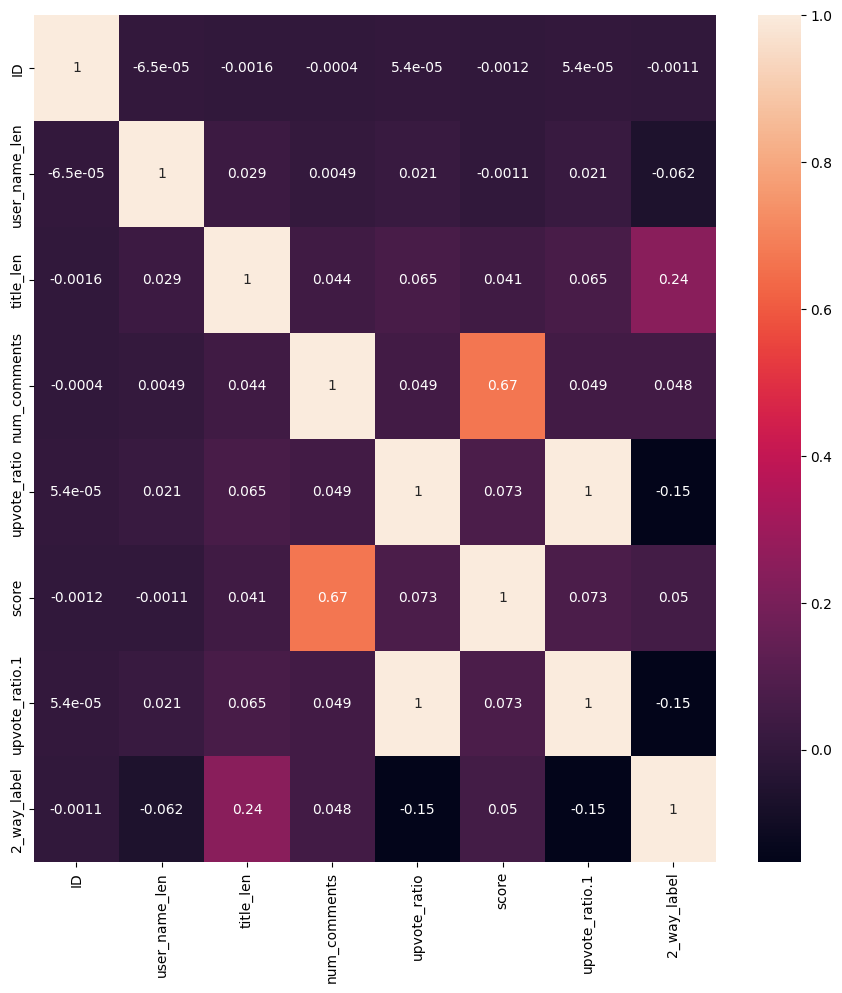

In [ ]:
# exploratory data analysis

df_numeric_attributes_only = df_imputed_outliers_removed.select_dtypes(include='number') # get columns that are numeric to get rid of error
feature_correlation = df_numeric_attributes_only.corr() # calculating the correlation

from matplotlib import pyplot as plt # importing matplotlib package to adjust figure size for better visual
plt.figure(figsize=(11,11))

# Visualizing correlations

import seaborn as sns
sns.heatmap(feature_correlation, annot=True) # creating a correlation heatmap for the `df_imputed_outliers_removed` dataframe


The positive correlation observed between the number of comments on a post and its score suggests a strong association between these two variables. This correlation implies that posts with a higher number of comments tend to receive higher scores, and conversely, posts with lower comment counts may have lower scores.

This positive correlation between comments and score may indicate that user engagement, as measured by the number of comments, positively influences the overall popularity or perceived quality of a post. Conversely, posts that attract fewer comments may be perceived as less engaging or interesting by users, resulting in lower scores.

Furthermore, the negative correlation observed between the '2_way_label' column and attributes such as 'username_length' and 'upvote_ratio' is also noteworthy. This negative correlation suggests an inverse relationship between these variables, indicating that as one variable increases, the other tends to decrease, and vice versa.

For example, a negative correlation between '2_way_label' and 'username_length' may indicate that posts authored by users with shorter usernames are more likely to be labeled in a certain way (e.g., as fake news) compared to posts authored by users with longer usernames. Similarly, a negative correlation between '2_way_label' and 'upvote_ratio' may suggest that posts with higher upvote ratios are less likely to be labeled in a certain way, while posts with lower upvote ratios may be more prone to such labeling.

<Axes: xlabel='score', ylabel='num_comments'>

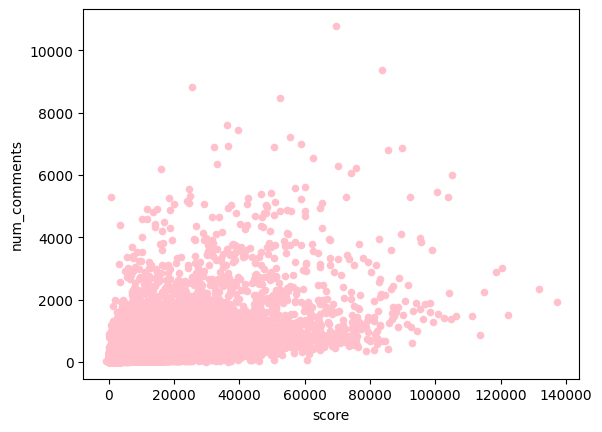

In [ ]:
# scatter plot

df_imputed_outliers_removed.plot.scatter(y='num_comments', x='score', c='Pink') # scatter plot inspecting the relationship between num_comments and score


This scatter plot does not show what I was expecting to see. Given the the positive correlation between the number of comments and upvote scoot I expected the data to be more linearly distributed. Instead the data points appear highly biased with a low variance.

<Axes: >

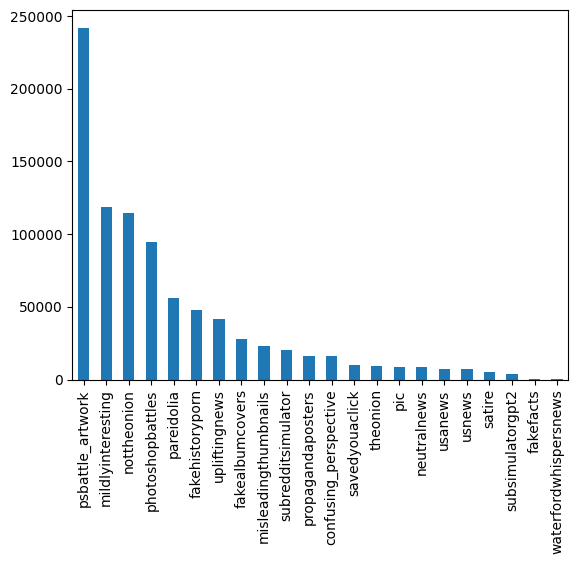

In [ ]:
# bar chart

df_imputed_outliers_removed.subreddit.value_counts().plot(kind='bar') # creating a bar chart based on the subreddit column

The bar chart clears shows that the most popular subreddit is called psbattle_artwork with the least popular being waterfordwhispersnews.

In [ ]:
# model training and evaluation

from sklearn.linear_model import LogisticRegression # importing the logistic regression model
from sklearn.model_selection import train_test_split # importing the train test split function to split question bank into training and testing

training_df, testing_df = train_test_split(df_imputed_outliers_removed, test_size=0.2) # the testing size has been split to use 20% of the data

training_df.shape

(702547, 11)

In this cell I am splitting the data into two sets. One for training and one for testing, of which I have set aside 20% of the data for this reason. The last code I did in this cell is just to see how much data will be used.

In [ ]:
testing_df.shape # checking the amount of data going towards the testing set

(175637, 10)

The testing data is less than the training data which makes sense and is what I am aiming for.

In [ ]:

training_features = training_df[['new_subreddit']] # training the data using only one feature, new_subreddit
training_target = training_df['2_way_label'] # 2_way_label is our target attribute

testing_features = testing_df[['new_subreddit']] # testing the data using one feature
testing_target = testing_df['2_way_label']

print('data for training', training_features.shape, training_target.shape)
print('data for testing', testing_features.shape, testing_target.shape) # to further verify that the data was selected correctly

data for training (702547, 1) (702547,)
data for testing (175637, 1) (175637,)


In this coding block I used the hold out method to train the data based on the new_subreddit feature with target attribute being 2_way_label. I then verified that the data is correct and the results of this is that it shows that it shows that both the training and testing have taking the appropriate number of samples to be used with the one feature identified.



In [ ]:
model = LogisticRegression() # assigning the logistic regression model to variable model

In [ ]:
model.fit(training_features, training_target) # using the fit function to train the model with training features and training target as argument

LogisticRegression()

No need to add additional information such as solver or max_iteration to logistic regression model. The output for the above cell block produces no erros and uses the training_freatures and training_target as parameters within the fit function.

In [ ]:
from sklearn.metrics import accuracy_score # importing accuracy_score function from sklearn.metrics

predictions = model.predict(testing_features) # assigning the predictions variable to the results of the testing features prediction
predictions[:30] # printing the first 30 numbers of the prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
accuracy_score(testing_target, predictions) # checking the accuracy of the testing target on prediction.

0.5590507694847896

The accuracy score is 55%. Which is relatively good considering it's more than halfway accurate.

In [ ]:
predictions = model.predict(training_features) # assigning the predictions variable to the results of the training features prediction
predictions[:10] # printing the first 1- numbers of the prediction

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

Compared to the testing data the results of the training features gave the result of 1 much sooner.


In [ ]:
accuracy_score(training_target, predictions) # checking the accuracy of the training target on prediction.

0.5575014910034489

Similar to the testing_target the accuracy score for the training_target is also 55%.

In [ ]:

training_features = training_df[['new_subreddit', 'num_comments','hasImage','upvote_ratio','score', 'title_len']] # training the data using six features
training_target = training_df['2_way_label'] # 2_way_label is our target attribute

testing_features = testing_df[['new_subreddit', 'num_comments','hasImage','upvote_ratio','score', 'title_len']] # testing the data using six features
testing_target = testing_df['2_way_label']

print('data for training', training_features.shape, training_target.shape)
print('data for testing', testing_features.shape, testing_target.shape) # to further verify that the data was selected correctly

data for training (702547, 6) (702547,)
data for testing (175637, 6) (175637,)


Verifying the data shows the same results as earlier, signifying that it was done correctly. The only different is the change of a 6 instead of a 1 to signify the 6 features now being used.



In [ ]:
model = LogisticRegression(max_iter=1000) # added max_iter=1000 to previous code in order to train it more
model.fit(training_features, training_target) # using the fit function to train the model with training features and training target as argument

LogisticRegression(max_iter=1000)

At first an error shown due to the max iterations not being high enough. Thus the max iteration was changed to 1000.

In [ ]:
predictions = model.predict(testing_features) # assigning the predictions variable to the results of the testing features prediction
predictions[:30] # printing the first 30 numbers of the prediction

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1])

Immediate and obvious difference when compared to the previous iteration of this which only used one feature. There is more diversity between the 0's and 1's.

In [ ]:
accuracy_score(testing_target, predictions) # checking the accuracy of the testing target on prediction.

0.7068271491769957

The accuracy score is also much higher than previous rounds. Being at 70%. I believe that this is due to the model simply being able to learn more with the larger amount of features available to it.

In [ ]:
predictions = model.predict(training_features) # assigning the predictions variable to the results of the testing features prediction
predictions[:10] # printing the first 10 numbers of the prediction

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 1])

The training features also shows an obvious difference, with the frequency of 1's being much higher.

In [ ]:
accuracy_score(training_target, predictions) # checking the accuracy of the training target on prediction.

0.7072067776248422

The accuracy score is also 70%. Similar to the accuracy score for the testing_target using 6 features


# Final thoughts

The assignment highlighted the importance of data preprocessing and feature selection in machine learning tasks.
Using multiple features significantly improved model performance compared to using a single feature.
Further experimentation with different algorithms and hyperparameter tuning could enhance model accuracy.

Overall, the assignment provided valuable insights into data analysis and modeling techniques, contributing to a deeper understanding of predictive analytics.